<img align=center src="https://rhyme.com/assets/img/logo-dark.png"></img>
<h2 align=center> Multilayer Perceptron Models with Keras</h2>

## Task 1: Project Overview and Import Modules

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters #this dataset has 10000 news headlines as input and topic of article as output(10000 exapmples belong to one of 46 classes/topics)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.0.0-beta1


## Task 2: Load the Reuters Dataset

In [29]:
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(X_train,y_train),(X_test,y_test)=reuters.load_data(num_words=10000,test_split=0.2) 
np.load = np_load_old
#load 10000 most frequently occuring words as dictionary and X_train and X_test doesnt have news headlines text but vectors 
#indicating the dictionary index of each word in the headline and 0 indicates that word of the headline is not present in 
#the 10000 most frequently occuring word dictionary.

In [30]:
print(len(X_train),'training examples')
print(len(X_test),'test examples')

8982 training examples
2246 test examples


In [31]:
num_classes=np.max(y_train)+1
print(num_classes,'classes')

46 classes


In [32]:
X_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

## Task 3: Vectorize Sequence Data and One-hot Encode Class Labels

In [33]:
#to convert the above sequence form of text data to Vector Form(CountVectorizer,Tfidf or Binary Vectorizer)

tokenizer=Tokenizer(num_words=10000) #this is equivalent of fit method of nltk vectorizer where dictionary is formed and instead of fitting on entire corpus dictionary formed of 10000 most fequent words of entire corpus

X_train=tokenizer.sequences_to_matrix(X_train,mode='binary') #mode can be Count,Tfidf also

X_test=tokenizer.sequences_to_matrix(X_test,mode='binary') #equivalent of transform method of nltk tokenizer

X_train.shape,X_test.shape #each row is feature vector for thaat example and as binary vectorizer used so just 0 or 1 values will indicate whether a particular word from dictionary is present in the example or not.

((8982, 10000), (2246, 10000))

In [34]:
#to convert class labels to one hot encoding form of binary valued matrix to feed to categorical entropy loss function
#for mullti class classification problem if dont one hot encode labels then can only use less efficient sparse categorical entropy loss function

y_train=tf.keras.utils.to_categorical(y_train,num_classes) #num_classes is constant we set to 46 above which tells keras to convert each label entry to a 46 size vector.
y_test=tf.keras.utils.to_categorical(y_test,num_classes)
y_train.shape,y_test.shape

((8982, 46), (2246, 46))

## Task 4: Build Multilayer Perceptron Model

In [35]:
#lets build a sequential model in which we can directly pass layers as items in a list(we uild a model: input layer->hidden layerr->output layer) 
model=Sequential([
    
    #no need to explicitly mention input layer and directly start with hidden layer
    
    Dense(512,input_shape=(10000,)),   #Dense is just a Fully Connected Layer with 512 neurons and input with 10000 features/input neurons
    Activation('relu'),
    Dropout(0.5),                        #reglarization in which random nodes are dropped relative to value passsed i.e. 0.5 means 50%of nodes are randomly dropped for each example
     
    #output layer with 46 units
    Dense(num_classes),
    Activation('softmax')
]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               5120512   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_5 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


## Task 5: Train Model

In [36]:
#NOT GOOD PRACTICE TO DEFINE NUMBER OF EPOCHS INSTEAD USE KERAS IN BUILT EARLY STOPPING MODULE

#what early stopping does is when given a metric it checks till whenn model is improving on metric and as soon as model stops improving metric it stops training
#thus hepls avoid underfitting and overfitting as val_score or val_accuracy when stops improving indicates that model is performing 
#as well as it can on test/dev set with current parameters and further training will cause it to overfit training data

from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_accuracy', #monitor improvement on validation score to determine when to stop training
                patience=3,  #check for improvement after every 3 epochs to make decision on when to stop training
                verbose=1,  #to see ouput
                                )

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [37]:
history=model.fit(X_train,y_train, #storing it to history will allow us to plot later
                 epochs=100, #can set to any large number and es will take care to stop training at right epoch
                 batch_size=32,
                 validation_split=0.1, #train+dev(val)+test sets and dev set which contains 10% of training data used for model optimization as even es stopping criterion based on val_loss
                 callbacks=[es] 
                 )

Train on 8083 samples, validate on 899 samples
Epoch 1/100
8083/8083 [==============================] - 18s 2ms/sample - loss: 1.2931 - accuracy: 0.7200 - val_loss: 0.9701 - val_accuracy: 0.7909
Epoch 2/100
8083/8083 [==============================] - 14s 2ms/sample - loss: 0.5051 - accuracy: 0.8841 - val_loss: 0.8489 - val_accuracy: 0.8131
Epoch 3/100
8083/8083 [==============================] - 12s 1ms/sample - loss: 0.2830 - accuracy: 0.9357 - val_loss: 0.8901 - val_accuracy: 0.8154
Epoch 4/100
8083/8083 [==============================] - 12s 1ms/sample - loss: 0.2161 - accuracy: 0.9483 - val_loss: 0.9613 - val_accuracy: 0.8142
Epoch 5/100
8083/8083 [==============================] - 12s 1ms/sample - loss: 0.1916 - accuracy: 0.9525 - val_loss: 1.0463 - val_accuracy: 0.7976
Epoch 6/100
8083/8083 [==============================] - 13s 2ms/sample - loss: 0.1920 - accuracy: 0.9562 - val_loss: 1.0190 - val_accuracy: 0.8076
Epoch 00006: early stopping


## Task 6: Evaluate Model on Test Data

In [38]:
model.evaluate(X_test,y_test,batch_size=32,verbose=1)  # 80%is accuracy

2246/2246 [==============================] - 3s 1ms/sample - loss: 0.9805 - accuracy: 0.8028


[0.9804594858565292, 0.8027605]

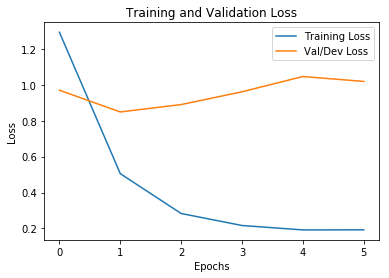

In [39]:
plt.plot(range(len(history.history['loss'])),history.history['loss'],label='Training Loss')
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'],label='Val/Dev Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

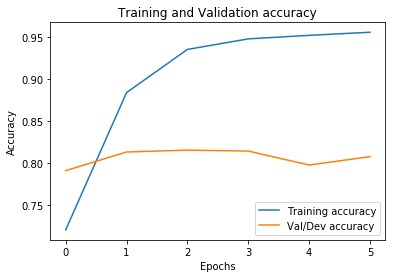

In [40]:
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'],label='Training accuracy')
plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'],label='Val/Dev accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()